## Introdução

Problemas de Regressão são problemas de previsão de dados. Regressão não é um conceito da área de Machine Learning em si, mas da Estatística. Os conceitos que serão abordados, podem ser aplicados tanto para a regressão simples quanto para múltipla. Aliás, como diferenciá-las? E o que é Regressão?

## Regressão

É o ato de prever, a partir de dados históricos, dados no futuro. Em Estatística, o termo a se procurar é Análise de Regressão. Este, estuda a relação entre duas ou mais variáveis, em que uma depende de outra ou outras. Quando eu tenho uma relação de um para um, eu tenho uma Regressão Linear Simples (que vou chamar de RLS daqui para frente), e quando eu tenho uma relação de um para muitos, eu tenho uma Regressão Linear Múltipla (RLM ok?).

Quando aprendemos Estatística, seja na escola ou na faculdade, aprendemos um conceito chamado Correlação. Aprendemos que, eu posso ter uma variável dependendo positivamente ou negativamente em relação a alguma outra. Exemplo: eu posso ter a distância percorrida, em metros, em função da velocidade de um objeto, em metros por segundo. Claro que aqui haverá uma correlação perfeita. Mas imagine um outro exemplo: imagine encontrar uma correlação entre o preço de um imóvel e seu tamanho. Neste caso, podemos não ter uma correlação perfeita, mas podemos entender que há um padrão nos dados, e que um valor depende de outro ou outros. Isso é correlação. A Regressão, já é a descoberta dessa função, que expressa o padrão nos dados. Ou seja, quando eu desenvolvo um trabalho de Análise de Regressão, eu busco entender o padrão de um valor dependendo de outro ou outros, e assim encontro uma função que expressa esse padrão.

## O que é uma Regressão Linear Simples?

RLS é basicamente uma função de primeiro grau. O objetivo do meu modelo de ML, é dado um conjunto de dados, entender o padrão dentro deles, que possa ser descrito por uma função de primeiro grau, com uma variável. Quando tratamos de mais de uma variável, estamos olhando para uma RLM.

Veja como é a famosa função de primeiro grau para uma variável e seu gráfico

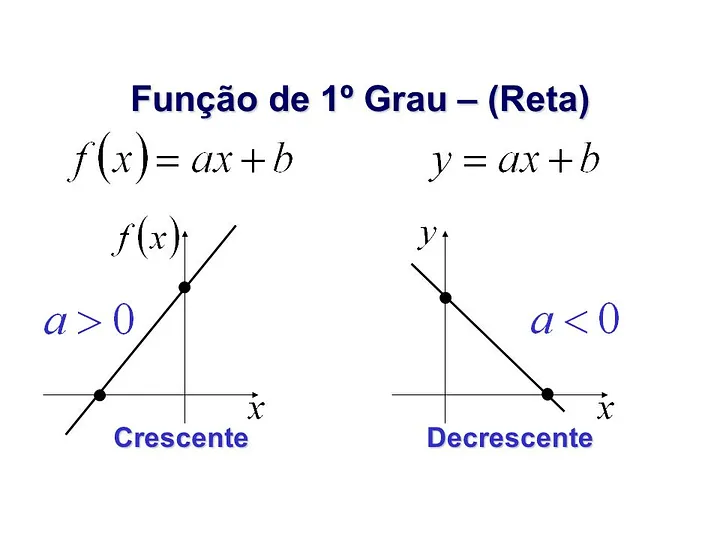

Antes de continuarmos, alguns conceitos importantes:

* variável preditora: é a variável independente, que tem o poder de influenciar na variável que nós queremos encontrar. No exemplo do preço da casa, a variável preditora pode ser o seu tamanho, a quantidade de quartos ou alguma outra informação. Quem vai nos dizer? Os dados que dispomos. Na equação acima, ela será o valor de a.
* variável alvo ou dependente: é a variável que queremos prever. No nosso exemplo, será o preço da casa. Na equação acima, ela terá como valor o resultado da função para cada valor de y.

Os valores de a e b não são conhecidos por nós quando construímos o modelo. São valores que o algorítimo irá descobrir para fazer as predições. Eles possuem um nome especial: chamam-se coeficientes. Vejamos como calcular tais valores.

## Como calcular os coeficientes numa função de primeiro grau?

Os algoritmos de Regressão Linear, em sua maioria, utilizam um método para calcular tais coeficientes: o nome dele é Método dos Mínimos Quadrados (MMQ), ou Métodos dos Quadrados Ordinários (MQO) ou ainda, em inglês, Ordinary Least Squares (OLS). Tal método, visa buscar o melhor valor que os coeficientes possam atingir, de maneira que a diferença entre o valor predito pela função e o real, sejam os menores.

## Avaliando o Modelo de Regressão Linear

Há alguns fatores que precisam ser considerados na análise do meu modelo, para saber se está tendo uma boa performance.

* Teste F de Significância global: afirma se ao menos uma variável do meu modelo está relacionada com a variável alvo. Para isso, o valor-p desta estatística precisa ser menor que 0.05
* Teste de Significância individuais ou p-values dos coeficientes: diz o quanto das variáveis preditoras explicam a variável alvo. A métrica padrão é o p-value ser menor que 0.05.
* Coeficiente R²: diz o quanto o meu modelo explica seus resultados. É um valor entre 0 e 1. Quanto mais próximo de 1, melhor.

A seguir, explico cálculo por trás do R².

## Entendendo o cálculo do R²

O R², também chamado de Coeficiente de Determinação, diz o quanto meu modelo está prevendo corretamente. O cálculo dele, envolve três medidas:

* Soma Total dos Quadrados (STQ): mostra a variação de y em torno da própria média. É o somatório das diferenças entre o valor alvo real e sua média elevado ao quadrado.

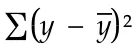

* Soma dos Quadrados dos Resíduos (SQU): variação de Y que não é explicada pelo modelo elaborado. É o somatório das diferenças entre o valor predito e o valor real elevados ao quadrado.

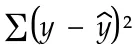

* Soma dos Quadrados de Regressão (SQR): oferece a variação de Y considerando as variáveis X utilizadas no modelo. É a diferença entre o valor de SQT e SQU. Portanto: SQR = SQT — SQU

O valor de R² é o próprio SQR dividido pelo SQT, ou seja, é divisão da variação explicada pelo variação total dos dados.

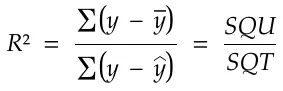


## Exemplo prático usando scikit-learn e statsmodels

Primeiramente, irei fazer uma análise do nosso modelo com o statsmodels, mostrando alguns números interessante, depois iremos fazer a mesma coisa, só que com o scikit-learn.

Antes de mais nada, quem é o scikit-learn e o statsmodels? O primeiro é a principal biblioteca de ML em Python. Possui implementação de inúmeros algoritmos de ML, desde de algoritmos de Regressão e Classificação como também Redes Neurais. Possui vasta documentação, que pode ser conferida aqui.

Já o statsmodels, é focado em ser uma ferramenta estatística, like R, para Python. Na minha opinião, o uso dele é recomendado, quando estamos explorando modelos de ML para a nossa aplicação, pois ele fornece algumas estatísticas bastante interessante. Aliás, usarei ele agora para termos tais estatísticas.

Antes, vamos importar as bibliotecas que iremos usar e dar uma olhada nos dados que iremos trabalhar

In [ ]:
# importando as libs
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm# fonte: # fonte: http://www.portalaction.com.br/analise-de-regressao/12-estimacao-dos-parametros-do-modelo# criando variáveis que serão usadas daqui para frente# variável preditora
X = np.array([ 220, 220, 220, 220, 220, 225, 225, 225, 225, 225, 230, 230, 230, 230, 230, 235, 235, 235, 235, 235 ])# variável alvo
y = np.array([ 137, 137, 137, 136, 135, 135, 133, 132, 133, 133, 128, 124, 126, 129, 126, 122, 122, 122, 119, 122 ])

## Visualizando estatísticas do modelo usando statsmodels

Primeiramente, o que seriam essas estatísticas? Como dito anteriormente, ao construímos nosso modelo, precisamos nos ater a algumas informações, como o R², os p-values para cada coeficiente e Estatística-F. Tais informações, são os dados estatísticos do modelo.

In [ ]:
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(X)# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(y, X_sm).fit()# mostrando as estatísticas do modelo
results.predict(X_sm)

array([137.14, 137.14, 137.14, 137.14, 137.14, 131.98, 131.98, 131.98,
       131.98, 131.98, 126.82, 126.82, 126.82, 126.82, 126.82, 121.66,
       121.66, 121.66, 121.66, 121.66])

In [ ]:
print(results.summary())# mostrando as previsões para o mesmo conjunto passado

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     291.1
Date:                Sat, 25 May 2024   Prob (F-statistic):           1.47e-12
Time:                        12:18:36   Log-Likelihood:                -35.596
No. Observations:                  20   AIC:                             75.19
Df Residuals:                      18   BIC:                             77.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        364.1800     13.765     26.457      0.0

O que nos interessa aqui são o R-squared, o F-statistic juntamente com Prob (F-statistic), a coluna coef (os coeficientes) e a coluna P > [t] , que são os p-values para cada coeficiente.

## Escrevendo o modelo com o scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/housing.csv")

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4087 entries, 13343 to 1194
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4087 non-null   float64
 1   latitude            4087 non-null   float64
 2   housing_median_age  4087 non-null   float64
 3   total_rooms         4087 non-null   float64
 4   total_bedrooms      4087 non-null   float64
 5   population          4087 non-null   float64
 6   households          4087 non-null   float64
 7   median_income       4087 non-null   float64
 8   ocean_proximity     4087 non-null   object 
dtypes: float64(8), object(1)
memory usage: 319.3+ KB


In [ ]:
train_data = x_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9259,-120.07,36.96,42.0,963.0,216.0,471.0,211.0,2.2898,INLAND,66100.0
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,INLAND,162500.0
439,-122.29,37.85,52.0,477.0,119.0,218.0,106.0,2.5682,NEAR BAY,120000.0
5272,-118.52,34.04,43.0,2167.0,254.0,761.0,256.0,13.6842,<1H OCEAN,500001.0
11236,-117.96,33.81,34.0,1416.0,277.0,980.0,284.0,4.7772,<1H OCEAN,182500.0
...,...,...,...,...,...,...,...,...,...,...
8428,-118.36,33.92,26.0,3695.0,1144.0,2308.0,1009.0,2.6667,<1H OCEAN,229300.0
11175,-117.97,33.82,26.0,4013.0,985.0,2442.0,922.0,3.7655,<1H OCEAN,197700.0
13752,-117.16,34.05,23.0,3215.0,462.0,1411.0,435.0,6.0701,INLAND,149900.0
19302,-122.82,38.39,32.0,1437.0,257.0,752.0,245.0,4.7422,<1H OCEAN,240900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

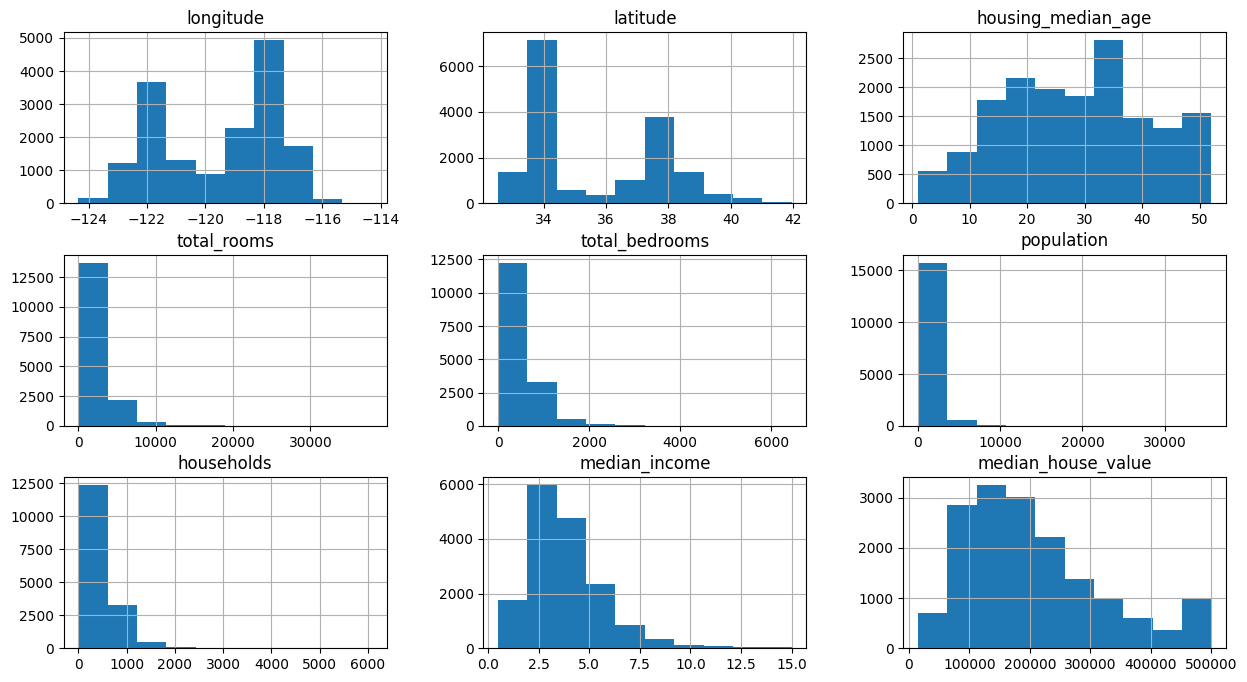

In [ ]:
train_data.hist(figsize=(15, 8))

<Axes: >

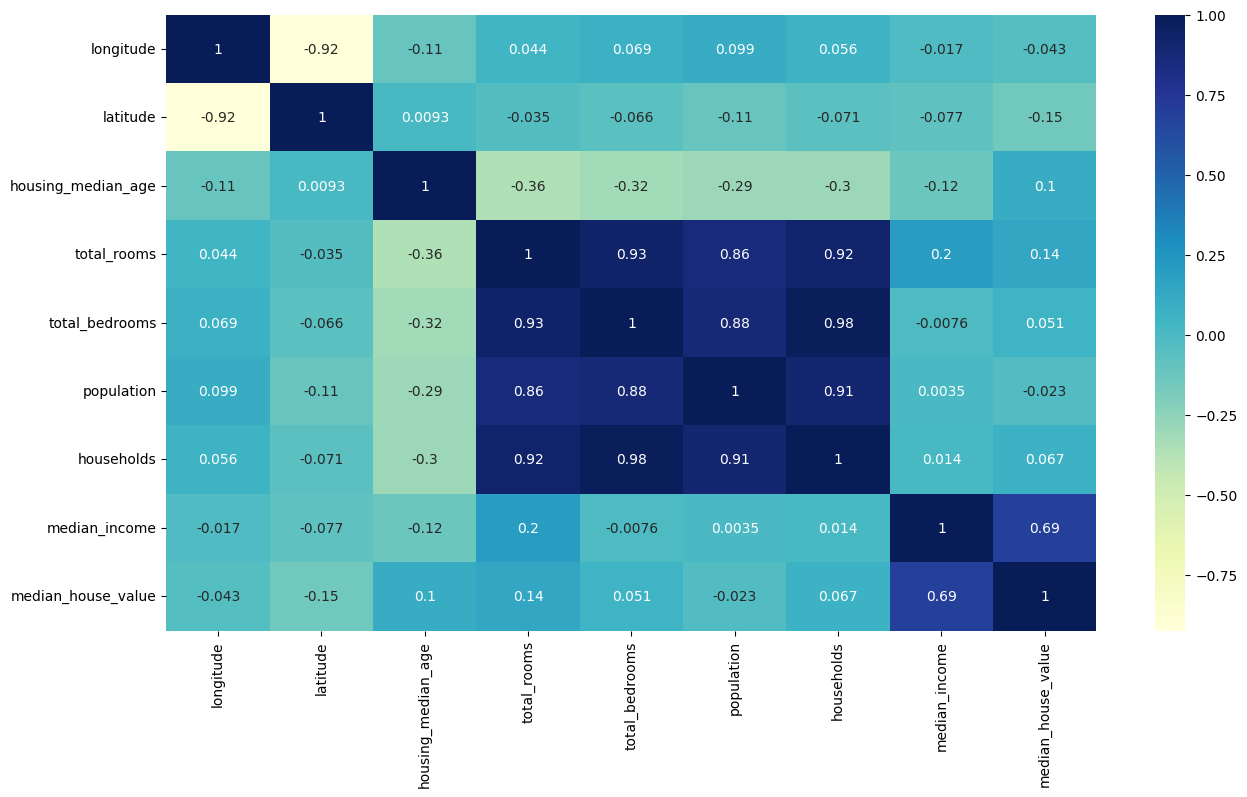

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

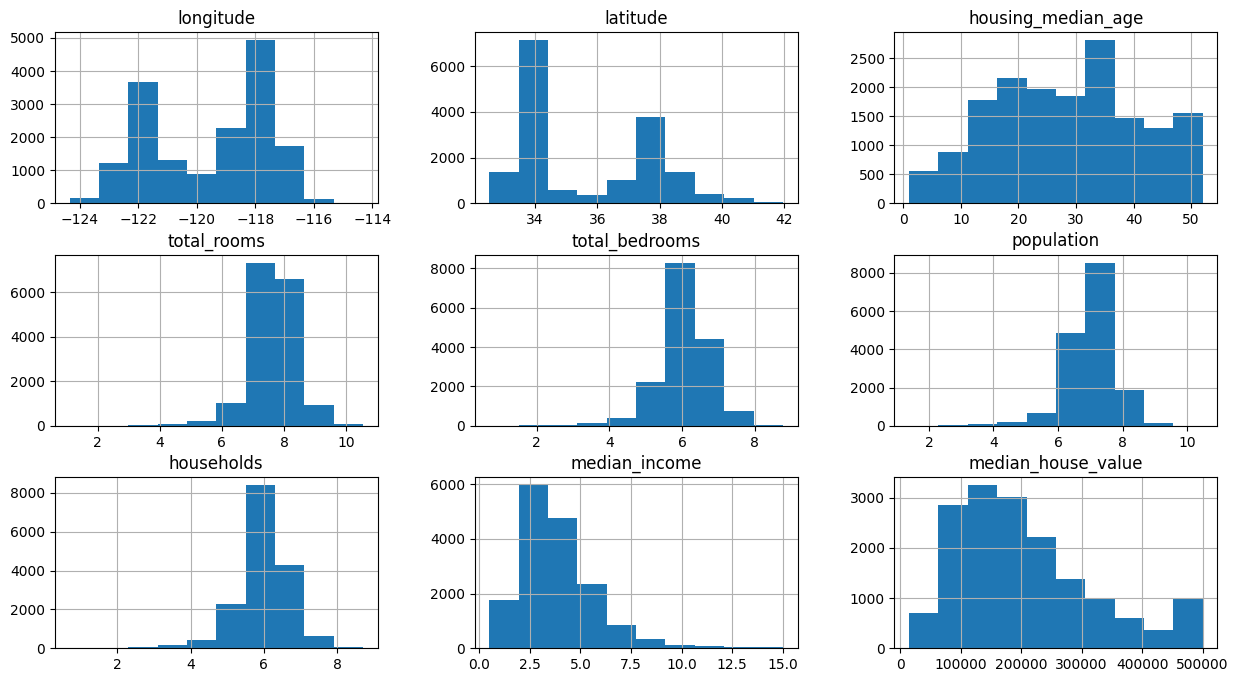

In [ ]:
train_data.hist(figsize=(15, 8))

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9259,-120.07,36.96,42.0,6.871091,5.379897,6.156979,5.356586,2.2898,66100.0,False,True,False,False,False
20627,-121.32,39.13,5.0,5.883322,4.189655,5.135798,4.094345,3.0000,162500.0,False,True,False,False,False
439,-122.29,37.85,52.0,6.169611,4.787492,5.389072,4.672829,2.5682,120000.0,False,False,False,True,False
5272,-118.52,34.04,43.0,7.681560,5.541264,6.635947,5.549076,13.6842,500001.0,True,False,False,False,False
11236,-117.96,33.81,34.0,7.256297,5.627621,6.888572,5.652489,4.7772,182500.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8428,-118.36,33.92,26.0,8.215006,7.043160,7.744570,6.917706,2.6667,229300.0,True,False,False,False,False
11175,-117.97,33.82,26.0,8.297544,6.893656,7.800982,6.827629,3.7655,197700.0,True,False,False,False,False
13752,-117.16,34.05,23.0,8.075894,6.137727,7.252762,6.077642,6.0701,149900.0,False,True,False,False,False
19302,-122.82,38.39,32.0,7.271009,5.552960,6.624065,5.505332,4.7422,240900.0,True,False,False,False,False


<Axes: >

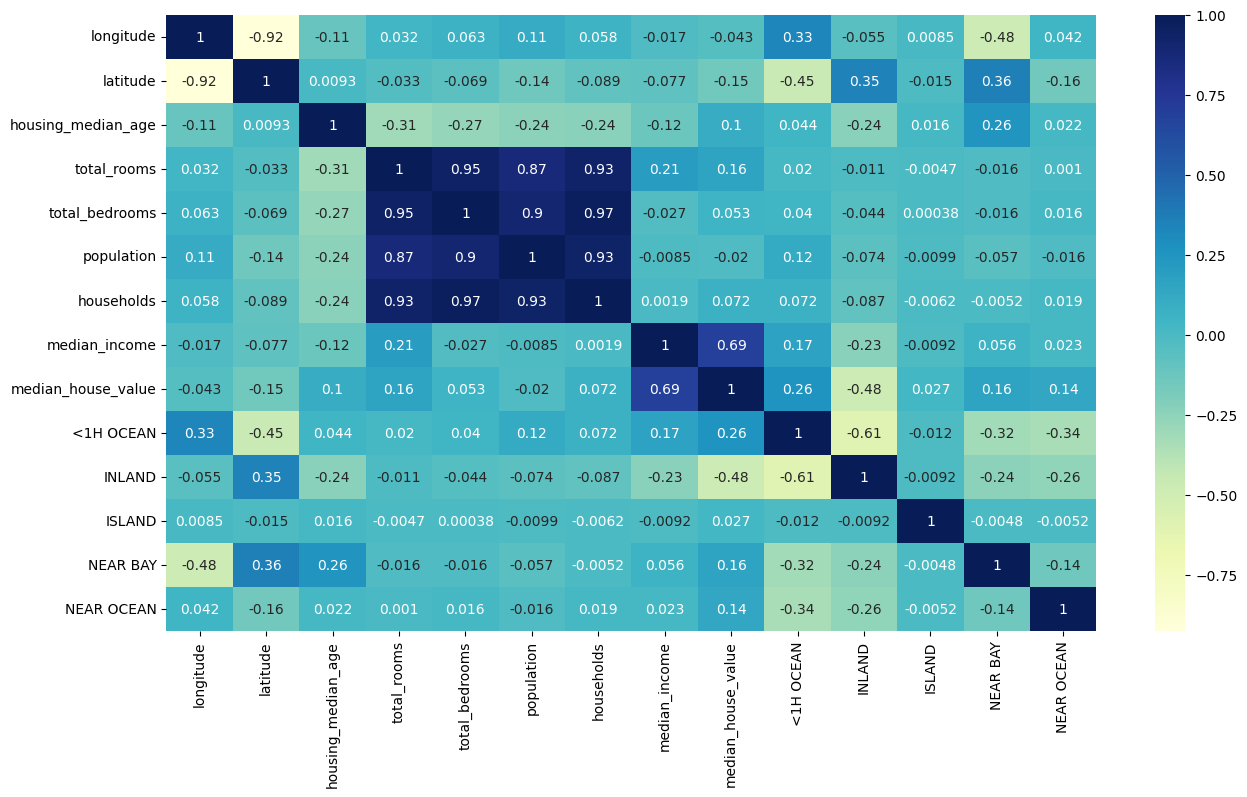

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

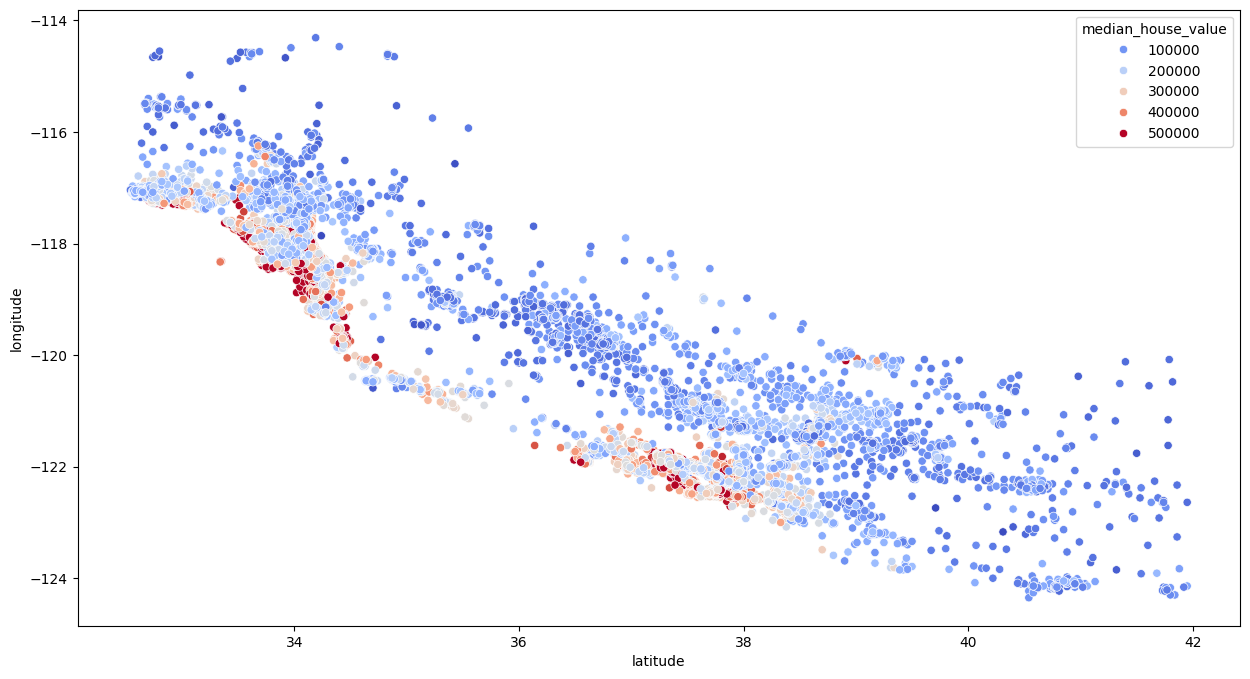

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [ ]:
train_data['bedroom_ratio'] = train_data["total_bedrooms"] / train_data['total_rooms']
train_data['household_rooms'] = train_data["total_rooms"] / train_data["households"]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [ ]:
x_train_s

array([[-0.24390198,  0.61745961,  1.0611492 , ..., -0.38204955,
        -0.24701529,  0.01740024],
       [-0.86925598,  1.63526266, -1.87351733, ..., -0.38204955,
        -2.1752645 ,  1.92385489],
       [-1.35453068,  1.03489957,  1.85430231, ..., -0.38204955,
        -0.43741685,  0.48200398],
       ...,
       [ 1.21192212, -0.74742836, -0.44584172, ..., -0.38204955,
        -0.87214318,  0.5867373 ],
       [-1.61968077,  1.28817775,  0.26799608, ..., -0.38204955,
        -0.77126984,  0.48701451],
       [-0.81922766,  1.18030001, -0.36652641, ..., -0.38204955,
         0.02748002, -0.11438172]])

In [ ]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data["total_bedrooms"] / test_data['total_rooms']
test_data['household_rooms'] = test_data["total_rooms"] / test_data["households"]

x_test, y_test= test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [ ]:
x_test_s = scaler.transform(x_test)

In [ ]:
reg.score(x_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-2212.7514351544596

In [ ]:
reg.score(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-2202.656839090605

<Axes: xlabel='households', ylabel='median_house_value'>

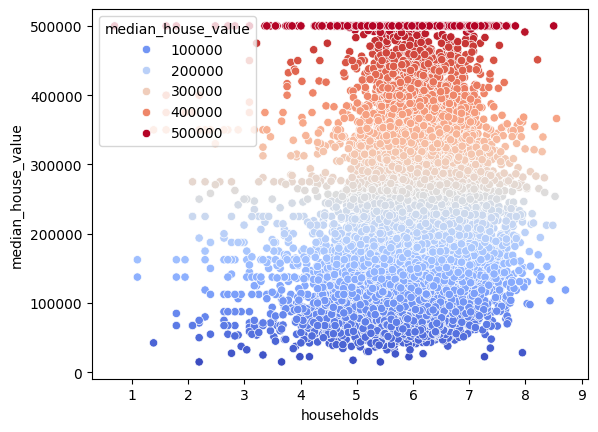

In [ ]:
sns.scatterplot(x="households", y="median_house_value", data=train_data, hue="median_house_value", palette="coolwarm")